# DSC 550 Exercise 7.2

## Author: Era Ebhodaghe

In [648]:
#importing Libraries

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Mushroom Classification

#### Step 1: Load data

In [680]:
mushroom_df = pd.read_csv('/Users/valuedcustomer/Downloads/mushrooms.csv')
mushroom_df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


#### Step 2: Convert all categorical features to dummy variables

In [682]:
mushroom_df = mushroom_df.astype('category')

In [683]:
mushroom_df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [684]:
#using label encoder to change features to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in mushroom_df.columns:
    mushroom_df[column] = le.fit_transform(mushroom_df[column])

In [685]:
mushroom_df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


#### Step 3: Split the data into a training and test set

In [687]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = mushroom_df.drop('class', axis=1)
y = mushroom_df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 4: Fit a decision tree classifier on the training set

In [689]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training set
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### Step 5: Create a confusion matrix for the model predictions on the the test set

In [691]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[843   0]
 [  0 782]]


#### Step 6: Create a visualization of the decision tree

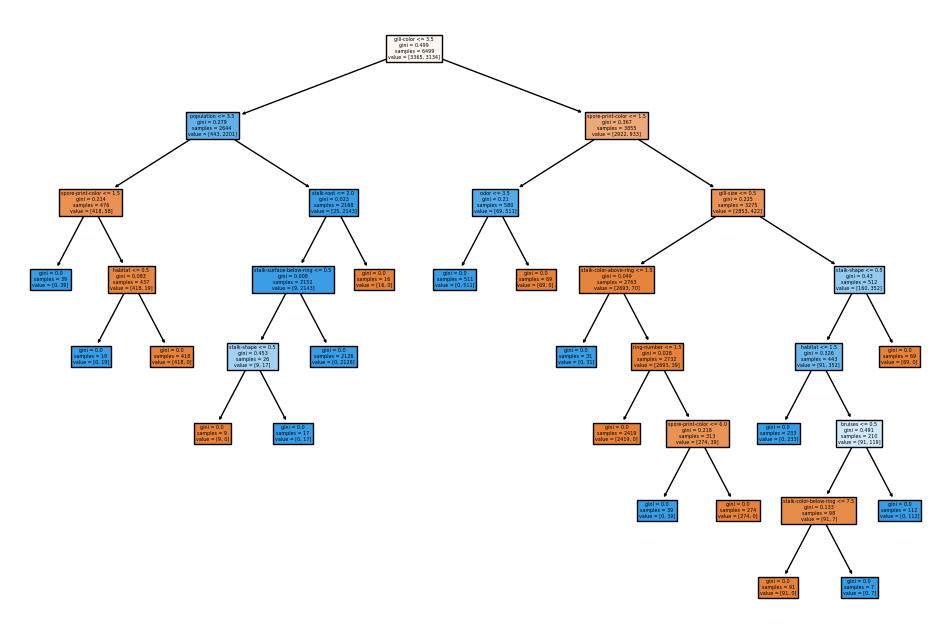

In [693]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Creating a visualization of the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

#### Step 7 and 8: Use chi-square statistic selector to pick the five best features

In [695]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply chi-square statistic selector to pick the five best features
selector = SelectKBest(chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['bruises', 'gill-size', 'gill-color', 'stalk-root', 'ring-type'], dtype='object')


#### Step 9: Repeat steps 4 and 5 with the five best features selected

In [697]:
clf_selected = DecisionTreeClassifier()
clf_selected.fit(X_train_selected, y_train)

# Transform the test set with selected features
X_test_selected = selector.transform(X_test)

# Predict the target variable for the test set with selected features
y_pred_selected = clf_selected.predict(X_test_selected)

# Calculate the accuracy of the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy (Selected Features):", accuracy_selected)

# Create a confusion matrix with selected features
confusion_mat_selected = confusion_matrix(y_test, y_pred_selected)
print("Confusion Matrix (Selected Features):")
print(confusion_mat_selected)

Accuracy (Selected Features): 0.9747692307692307
Confusion Matrix (Selected Features):
[[843   0]
 [ 41 741]]


#### Step 10: Summarize your findings

#### In this analysis, we first loaded the Mushroom Classification dataset and converted all categorical features to dummy variables. Then, we split the data into training and test sets. Next, we trained a decision tree classifier on the training set and evaluated its accuracy on the test set. We also created a confusion matrix to understand the model's predictions in more detail.
#### Additionally, we used the chi-square statistic selector to identify the five best features from the dataset. These features were selected based on their statistical significance in relation to the target variable. We repeated the steps of fitting the decision tree classifier and evaluating accuracy and confusion matrix using only the selected features.
#### By comparing the accuracy and confusion matrices between the model with all features and the model with selected features, we can assess the impact of feature selection on the model's performance.